# BP with decimation

In [1]:
using OffsetArrays, Statistics
include("../code/bp.jl")
include("../code/slim_graphs.jl")

findbasis_slow (generic function with 1 method)

In [2]:
m = factorial(5)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
H = 0.63
s = rand((-1,1), n)
efield = tanh.(H*copy(s))
bp = belief_propagation(n, m, nedges, Λ, K, efield)
B, freevars = findbasis_slow(permutedims(Array(bp.H)))

(Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 1 0; 0 0 … 0 1], [491, 1019, 1037, 1061, 1098, 1108, 1113, 1114, 1128, 1130  …  1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800])

In [146]:
efield[freevars] .= s[freevars]
bp.efield .= efield;

In [149]:
iteration!(bp; maxiter=10^4, tol=1e-10, damp=0.5, update! = update_factor_ms!) 

(0.36533460388461636, 10000)

In [118]:
all(abs.(bp.efield).==1)

true

In [119]:
performance(bp,s)

(0, 0.33444444444444443, 0.3327777777777778)

In [124]:
decimate!(bp, efield, freevars, maxiter=1000, Tmax=1, tol=1e-4, callback=cb_decimation, damp=0.5) 

Trial 1 of 1:  Step    0. Free = 480. ε = 9.05E-05. Unsat = 241. Ovl = 0.756. Iters 51
 Step    1. Free = 479. ε = 7.87E-05. Unsat = 241. Ovl = 0.756. Iters 15
 Step    2. Free = 478. ε = 8.32E-05. Unsat = 241. Ovl = 0.756. Iters 16
 Step    3. Free = 477. ε = 7.08E-05. Unsat = 241. Ovl = 0.756. Iters 18
 Step    4. Free = 476. ε = 5.14E-05. Unsat = 241. Ovl = 0.756. Iters 27
 Step    5. Free = 475. ε = 7.58E-05. Unsat = 241. Ovl = 0.756. Iters 18
 Step    6. Free = 474. ε = 7.49E-05. Unsat = 241. Ovl = 0.756. Iters 20
 Step    7. Free = 473. ε = 6.84E-05. Unsat = 241. Ovl = 0.756. Iters 21
 Step    8. Free = 472. ε = 6.96E-05. Unsat = 241. Ovl = 0.756. Iters 41
 Step    9. Free = 471. ε = 7.96E-05. Unsat = 241. Ovl = 0.756. Iters 21
 Step   10. Free = 470. ε = 8.88E-05. Unsat = 239. Ovl = 0.754. Iters 21
 Step   11. Free = 469. ε = 6.88E-05. Unsat = 239. Ovl = 0.754. Iters 46
 Step   12. Free = 468. ε = 9.35E-05. Unsat = 239. Ovl = 0.754. Iters 19
 Step   13. Free = 467. ε = 6.68E-05.

 Step  117. Free = 363. ε = 6.79E-05. Unsat = 205. Ovl = 0.730. Iters 31
 Step  118. Free = 362. ε = 5.43E-05. Unsat = 201. Ovl = 0.727. Iters 37
 Step  119. Free = 361. ε = 9.18E-05. Unsat = 199. Ovl = 0.726. Iters 37
 Step  120. Free = 360. ε = 9.75E-05. Unsat = 194. Ovl = 0.723. Iters 32
 Step  121. Free = 359. ε = 5.69E-05. Unsat = 194. Ovl = 0.723. Iters 36
 Step  122. Free = 358. ε = 7.10E-05. Unsat = 194. Ovl = 0.723. Iters 31
 Step  123. Free = 357. ε = 8.12E-05. Unsat = 194. Ovl = 0.723. Iters 30
 Step  124. Free = 356. ε = 5.98E-05. Unsat = 200. Ovl = 0.726. Iters 64
 Step  125. Free = 355. ε = 6.99E-05. Unsat = 200. Ovl = 0.726. Iters 23
 Step  126. Free = 354. ε = 6.83E-05. Unsat = 198. Ovl = 0.724. Iters 43
 Step  127. Free = 353. ε = 6.29E-05. Unsat = 198. Ovl = 0.724. Iters 18
 Step  128. Free = 352. ε = 5.02E-05. Unsat = 197. Ovl = 0.726. Iters 70
 Step  129. Free = 351. ε = 8.67E-05. Unsat = 197. Ovl = 0.726. Iters 33
 Step  130. Free = 350. ε = 6.15E-05. Unsat = 191. 

 Step  237. Free = 243. ε = 9.30E-05. Unsat = 146. Ovl = 0.678. Iters 38
 Step  238. Free = 242. ε = 6.96E-05. Unsat = 142. Ovl = 0.676. Iters 40
 Step  239. Free = 241. ε = 6.11E-05. Unsat = 136. Ovl = 0.671. Iters 65
 Step  240. Free = 240. ε = 8.13E-05. Unsat = 141. Ovl = 0.674. Iters 43
 Step  241. Free = 239. ε = 7.03E-05. Unsat = 136. Ovl = 0.672. Iters 72
 Step  242. Free = 238. ε = 6.81E-05. Unsat = 138. Ovl = 0.673. Iters 65
 Step  243. Free = 237. ε = 9.92E-05. Unsat = 137. Ovl = 0.672. Iters 41
 Step  244. Free = 236. ε = 9.41E-05. Unsat = 139. Ovl = 0.673. Iters 62
 Step  245. Free = 235. ε = 5.72E-05. Unsat = 140. Ovl = 0.673. Iters 64
 Step  246. Free = 234. ε = 8.05E-05. Unsat = 139. Ovl = 0.673. Iters 48
 Step  247. Free = 233. ε = 5.89E-05. Unsat = 141. Ovl = 0.676. Iters 67
 Step  248. Free = 232. ε = 7.17E-05. Unsat = 143. Ovl = 0.677. Iters 44
 Step  249. Free = 231. ε = 7.91E-05. Unsat = 143. Ovl = 0.677. Iters 64
 Step  250. Free = 230. ε = 5.04E-05. Unsat = 143. 

 Step  352. Free = 128. ε = 9.35E-05. Unsat =  69. Ovl = 0.600. Iters 69
 Step  353. Free = 127. ε = 5.63E-05. Unsat =  69. Ovl = 0.600. Iters 82
 Step  354. Free = 126. ε = 8.23E-05. Unsat =  66. Ovl = 0.597. Iters 78
 Step  355. Free = 125. ε = 8.27E-05. Unsat =  68. Ovl = 0.598. Iters 76
 Step  356. Free = 124. ε = 8.58E-05. Unsat =  68. Ovl = 0.598. Iters 26
 Step  357. Free = 123. ε = 6.88E-05. Unsat =  66. Ovl = 0.597. Iters 61
 Step  358. Free = 122. ε = 7.48E-05. Unsat =  70. Ovl = 0.599. Iters 76
 Step  359. Free = 121. ε = 8.03E-05. Unsat =  70. Ovl = 0.599. Iters 88
 Step  360. Free = 120. ε = 6.85E-05. Unsat =  66. Ovl = 0.596. Iters 72
 Step  361. Free = 119. ε = 6.97E-05. Unsat =  65. Ovl = 0.596. Iters 62
 Step  362. Free = 118. ε = 5.96E-05. Unsat =  64. Ovl = 0.596. Iters 66
 Step  363. Free = 117. ε = 8.77E-05. Unsat =  61. Ovl = 0.592. Iters 67
 Step  364. Free = 116. ε = 5.21E-05. Unsat =  61. Ovl = 0.592. Iters 28
 Step  365. Free = 115. ε = 8.24E-05. Unsat =  61. 

 Step  469. Free =  11. ε = 5.13E-05. Unsat =   1. Ovl = 0.541. Iters 38
 Step  470. Free =  10. ε = 9.35E-05. Unsat =   1. Ovl = 0.541. Iters 31
 Step  471. Free =   9. ε = 8.68E-05. Unsat =   1. Ovl = 0.541. Iters 55
 Step  472. Free =   8. ε = 8.54E-05. Unsat =   1. Ovl = 0.541. Iters 5
 Step  473. Free =   7. ε = 8.92E-05. Unsat =   1. Ovl = 0.541. Iters 8
 Step  474. Free =   6. ε = 8.97E-05. Unsat =   1. Ovl = 0.541. Iters 23
 Step  475. Free =   5. ε = 6.59E-05. Unsat =   1. Ovl = 0.541. Iters 127
 Step  476. Free =   4. ε = 3.29E-05. Unsat =   1. Ovl = 0.541. Iters 1
 Step  477. Free =   3. ε = 8.89E-05. Unsat =   1. Ovl = 0.541. Iters 24
 Step  478. Free =   2. ε = 9.47E-05. Unsat =   1. Ovl = 0.541. Iters 11
 Step  479. Free =   1. ε = 5.98E-05. Unsat =   1. Ovl = 0.541. Iters 15
 Step  480. Free =   0. ε = -1.00E+00. Unsat =   1. Ovl = 0.541. Iters 67
contradiction found. 1 unsat


(-1, NaN, NaN)

In [129]:
f = sign.(bp.efield[freevars]);

In [130]:
bp.efield .= 0
bp.efield[freevars] .= f
bp.m .= 0;

In [131]:
iteration!(bp; maxiter=1000, tol=1e-10, damp=0.5) 

(5.820766091346741e-11, 246)

In [132]:
performance(bp, s)

(37, 0.4633333333333334, 0.2683333333333333)

In [135]:
sum(bp.efield[freevars].==0)

0

In [136]:
y = sign.(bp.efield[freevars]) .==-1
x = B*y .% 2
length(x) == length(bp.efield)

true

In [139]:
sum(bp.H'*x .% 2)

0

In [141]:
dist = mean(x .!= (s.==-1))

0.25722222222222224

In [69]:
cb(it, ε, bp) = (mod(it,50)==0 && @show it,ε; false)
ε, iters = iteration!(bp, maxiter=10^3, tol=1e-18, callback=cb, damp=0.5)

(it, ε) = (50, 0.00016251586544159535)
(it, ε) = (100, 4.1876997480816414e-8)
(it, ε) = (150, 1.866329313315873e-11)
(it, ε) = (200, 8.298917109073045e-15)
(it, ε) = (250, 3.9968028886505635e-15)
(it, ε) = (300, 3.219646771412954e-15)
(it, ε) = (350, 2.3314683517128287e-15)
(it, ε) = (400, 2.220446049250313e-15)
(it, ε) = (450, 2.55351295663786e-15)
(it, ε) = (500, 2.1094237467877974e-15)
(it, ε) = (550, 2.9976021664879227e-15)
(it, ε) = (600, 1.9984014443252818e-15)
(it, ε) = (650, 3.9968028886505635e-15)
(it, ε) = (700, 2.886579864025407e-15)
(it, ε) = (750, 2.6645352591003757e-15)
(it, ε) = (800, 2.7755575615628914e-15)
(it, ε) = (850, 2.9976021664879227e-15)
(it, ε) = (900, 1.9984014443252818e-15)
(it, ε) = (950, 2.3314683517128287e-15)
(it, ε) = (1000, 3.774758283725532e-15)


(3.774758283725532e-15, 1000)

In [84]:
Hs = 1.4:0.05:2.0
maxiter = 10^4
bp = belief_propagation(n, m, nedges, Λ, K)
s = rand((-1,1), n)
for H in Hs
    efield = tanh.(H*copy(s))
    bp.efield .= efield
    bp.m .= 0
    ε, iters = iteration!(bp, maxiter=maxiter, tol=1e-10, damp=0.5)
    @printf("H=%.2f. ", H)
    if iters==maxiter
        @printf("Unconverged: ε=%1.2E\n", ε)
    else
       @printf("Converged after %d iters\n", iters) 
    end
end

H=1.40.   Converged after 1020 iters
H=1.45.   Converged after 1225 iters
H=1.50.   Converged after 1405 iters
H=1.55.   Converged after 1627 iters
H=1.60.   Converged after 2139 iters
H=1.65.   Converged after 5233 iters
H=1.70. Unconverged: ε=8.30E-02
H=1.75. Unconverged: ε=5.49E-02
H=1.80. Unconverged: ε=6.94E-02
H=1.85. Unconverged: ε=9.30E-02
H=1.90. Unconverged: ε=2.66E-01
H=1.95. Unconverged: ε=2.50E-01
H=2.00. Unconverged: ε=3.20E-01


## Average over more than one instance

In [108]:
m = factorial(5)*11*2
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
Hs = 10.0 .^ (-0.2:0.25:-0.2)
Hs = [0.4]
navg = 20
dist_f3 = [Float64[] for _ in eachindex(Hs)]
for j in 1:navg
    println("#### Round $j of $navg")
    bp = belief_propagation(n, m, nedges, Λ, K)
    _, freevars = findbasis_slow(permutedims(Array(bp.H)))
    s = rand((-1,1), n)
    for (i,H) in enumerate(Hs)
        println("------ H=", round(H,digits=4), ". ", i, " of ", length(Hs), " ------")
        fields = tanh.(H*copy(s))
        _,_,d = decimate!(bp, fields, freevars, maxiter=1000, Tmax=1, tol=1e-4) 
        isnan(d) || push!(dist_f3[i], d) 
    end
end

#### Round 1 of 20


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.4. 1 of 1 ------
Trial 1 of 1: contradiction found. 7 unsat
#### Round 2 of 20


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.4. 1 of 1 ------
Trial 1 of 1: contradiction found. 10 unsat
#### Round 3 of 20


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.4. 1 of 1 ------
Trial 1 of 1: 0 unsat
#### Round 4 of 20


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.4. 1 of 1 ------
Trial 1 of 1: 0 unsat
#### Round 5 of 20


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.4. 1 of 1 ------
Trial 1 of 1: contradiction found. 11 unsat
#### Round 6 of 20


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.4. 1 of 1 ------
Trial 1 of 1: contradiction found. 18 unsat
#### Round 7 of 20


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.4. 1 of 1 ------
Trial 1 of 1: contradiction found. 39 unsat
#### Round 8 of 20


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.4. 1 of 1 ------
Trial 1 of 1: 2 unsat
#### Round 9 of 20


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.4. 1 of 1 ------
Trial 1 of 1: 

LoadError: InterruptException:

Avg over 20 instances


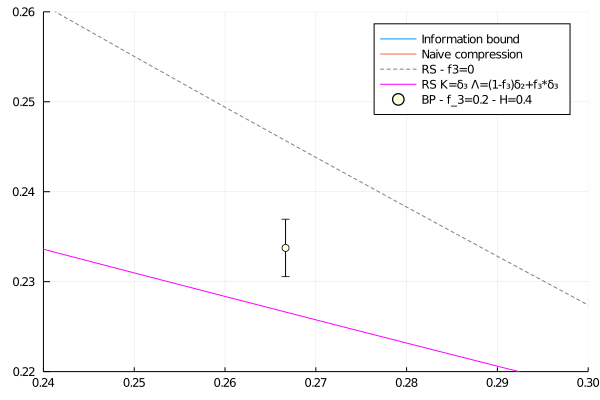

In [162]:
println("Avg over $navg instances")
colors = cgrad(:heat, length(Hs)+1, categorical = true)
pl_f3 = plot_rdb()
for (i,H) in enumerate(Hs)
    scatter!(pl_f3, [R], [mean(dist_f3[i])], 
        yerr = [std(dist_f3[i])/sqrt(length(dist_f3[i]))],
        label="BP - f_3=$(round(r,digits=1)) - H=$(round(H,sigdigits=2))", mc=colors[i], ms=4)
end
plot(pl_f3, size=(600,400), legend=:topright)
xlims!((0.24,0.30)); ylims!((0.22,0.26))